<a href="https://colab.research.google.com/github/d0rtilla/AbaloneAgePredictionProject/blob/main/Abalone_Age_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Abalone Age Predictor with Supervised Machine Learning

## Contributors: Jacob Douthett, Sam Espe, Alan Jallah, Jae Neuharth

### Extract and Transform Data
In this section we load the required libraries, install keras tuner on our colab environment, connect our colab to our google drive, and load / clean our dataset.

In [ ]:
# Import dependencies
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import tensorflow as tf

In [ ]:
# Install keras tuner
!pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 135 kB 6.7 MB/s 
     |████████████████████████████████| 1.6 MB 42.6 MB/s 


In [ ]:
# Connect colab to drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Read in data
file_path = "https://abalone-machine-learning-data.s3.us-east-2.amazonaws.com/abalone.csv"
df = pd.read_csv(file_path)
display(df)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [ ]:
# Find duplicate entries
print(f"Duplicate entries: {df.duplicated().sum()}")

Duplicate entries: 0


In [ ]:
# Check for missing values
df.isnull().sum(axis = 0)


Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [ ]:
# Get dummies on sex column
df = pd.get_dummies(df)
display(df)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1,0,0


In [ ]:
# Rename columns

df = df.rename(columns = {"Whole weight": "Whole_weight", "Shucked weight": "Shucked_weight", "Viscera weight": "Viscera_weight", "Shell weight": "Shell_weight"})
df

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1,0,0


### Visualizing Parameters
In this section, we use matplotlib to visualize and compare each datapoint's various parameters against its number of rings

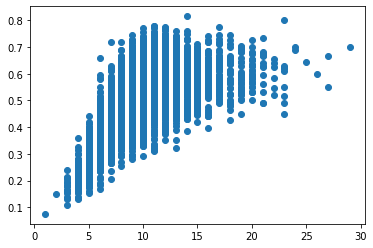

In [ ]:
# Import matplotlib as plt and begin visualizing parameters of dataset against number of rings.
import matplotlib.pyplot as plt


x = df["Rings"]
length = df["Length"]

# X = Rings | Y = Length
plt.scatter(x, length)
plt.show()

In [ ]:
diameter = df["Diameter"]

# X = Rings | Y = Diameter
plt.scatter(x, diameter)
plt.show()

In [ ]:
height = df["Height"]

# X = Rings | Y = Height
plt.scatter(x, height)
plt.show()

In [ ]:
df.loc[df["Height"] > 0.4]

In [ ]:
df.loc[df["Height"] == 0]

In [ ]:
whole = df["Whole_weight"]

# X = Rings | Y = Whole Weight
plt.scatter(x, whole)
plt.show()

In [ ]:
shucked = df["Shucked_weight"]

# X = Rings | Y = Shucked Weight
plt.scatter(x, shucked)
plt.show()

In [ ]:
viscera = df["Viscera_weight"]

# X = Rings | Y = Viscera Weight
plt.scatter(x, viscera)
plt.show()

In [ ]:
shell = df["Shell_weight"]

# X = Rings | Y = Shell Weight
plt.scatter(x, shell)
plt.show()

In [ ]:
# Create new dataframe without outliers

df_no_outliers = df.drop(index = [1417, 2051, 1257, 3996])

In [ ]:
x_no = df_no_outliers["Rings"]
height_no = df_no_outliers["Height"]

plt.scatter(x_no, height_no)
plt.show()

### Multiple Linear Regressions

#### Multiple Linear Regression Model

In [ ]:
# Create model

multLinReg = LinearRegression()

In [ ]:
# Split data into training and testing sets

X = df.drop(columns = "Rings")
y = df["Rings"]

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 3)

In [ ]:
# Scale data with standard scaler

scaler = StandardScaler()

In [ ]:
# Fit scaler to training data
scaler.fit(X_train) 


In [ ]:
# Scale X train and test data 
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Train model

multLinReg.fit(X_train_scaled, y_train)

In [ ]:
# Test model

multLinReg.predict(X_test_scaled)

In [ ]:
# Evaluate model on training set
multLinReg.score(X_train_scaled, y_train)

In [ ]:
# Evaluate model on test set

multLinReg.score(X_test_scaled, y_test)

In [ ]:
# calculate regression coefficient
multLinReg.coef_

array([-0.23240941,  1.2841631 ,  0.41559035,  3.92823551, -4.15323543,
       -1.03471661,  1.43566168,  0.10059333, -0.26916476,  0.16627512])

In [ ]:
# calculate y-intercept 
multLinReg.intercept_

9.94220945083014

#### Multiple Linear Regression without 2 height outliers

In [ ]:
# Create model
multLinReg2 = LinearRegression()

In [ ]:
# Split data into training and testing sets
X_no = df_no_outliers.drop(columns = "Rings")
y_no = df_no_outliers["Rings"]

In [ ]:
# Split data into training and testing sets
X_no_train, X_no_test, y_no_train, y_no_test = train_test_split(X_no, y_no, random_state = 3)

In [ ]:
# Scaling data with standard scaler
scaler_no = StandardScaler()

In [ ]:
# Fit scaler to training data
scaler_no.fit(X_no_train)

StandardScaler()

In [ ]:
# Scale training and testing data
X_no_train_scaled = scaler_no.transform(X_no_train)
X_no_test_scaled = scaler_no.transform(X_no_test)

In [ ]:
# train model
multLinReg2.fit(X_no_train_scaled, y_no_train)

LinearRegression()

In [ ]:
# test model
multLinReg2.predict(X_no_test_scaled)

array([ 8.4027033 ,  9.68212737, 10.61402308, ...,  7.05080196,
        8.13314824,  9.30942069])

In [ ]:
# Evaluate model on training set
multLinReg2.score(X_no_train_scaled, y_no_train)

0.5506328743094396

In [ ]:
# Evaluate model on test set
multLinReg2.score(X_no_test_scaled, y_no_test)

0.5198595463446136

In [ ]:
# Calculate regression coefficient
multLinReg2.coef_

array([-0.33064728,  1.08890433,  0.94007483,  4.31004307, -4.40268111,
       -1.11526947,  1.12162209,  0.11174892, -0.25098426,  0.13527283])

In [ ]:
# Calculate Y-intercept
multLinReg2.intercept_

9.930648769574944

#### Multiple Linear Regression with MinMax Scaler

In [ ]:
# Create model
multLinReg3 = LinearRegression()

In [ ]:
# Split data into training and testing sets
X_minmax = df_no_outliers.drop(columns = "Rings")
y_minmax = df_no_outliers["Rings"]

In [ ]:
# Split data into training and test sets
X_minmax_train, X_minmax_test, y_minmax_train, y_minmax_test = train_test_split(X_minmax, y_minmax, random_state = 3)

In [ ]:
# Scale data with MinMax Scaler
scaler_minmax = MinMaxScaler()

In [ ]:
# fit data to scaler
scaler_minmax.fit(X_minmax_train)

MinMaxScaler()

In [ ]:
# scale data 
X_minmax_train_scaled = scaler_minmax.transform(X_minmax_train)
X_minmax_test_scaled = scaler_minmax.transform(X_minmax_test)

In [ ]:
# train model
multLinReg3.fit(X_minmax_train_scaled, y_minmax_train)

LinearRegression()

In [ ]:
# test model
multLinReg3.predict(X_minmax_test_scaled)

array([ 8.421875,  9.703125, 10.640625, ...,  7.03125 ,  8.171875,
        9.3125  ])

In [ ]:
# Evaluate training set
multLinReg3.score(X_minmax_train_scaled, y_minmax_train)

0.5506211574152733

In [ ]:
# Evaluate testing set
multLinReg3.score(X_minmax_test_scaled, y_minmax_test)

0.5195227159847559

In [ ]:
# Calculate Regression Coefficient
multLinReg3.coef_

array([-1.87980859e+00,  6.23075325e+00,  5.73665514e+00,  2.44544177e+01,
       -2.69960962e+01, -7.82880705e+00,  8.02040522e+00,  8.69214236e+13,
        8.69214236e+13,  8.69214236e+13])

In [ ]:
# Calculate Y-intercept
multLinReg3.intercept_

-86921423639368.84

A multiple linear regression doesn't seem to be working.

### K Nearest Neighbors Regressor

In [ ]:
# Import K Nearest Neighbors Regressor
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
# Create model
knn = KNeighborsRegressor()

In [ ]:
# Split data into training and testing sets
X_knn = df_no_outliers.drop(columns = "Rings")
y_knn = df_no_outliers["Rings"]

In [ ]:
# Split data into training and testing sets
X_knn_train, X_knn_test, y_knn_train, y_knn_test = train_test_split(X_knn, y_knn, random_state = 3)

In [ ]:
# Scale data with standard scaler
scaler = StandardScaler()

In [ ]:
# Fit data to scaler
scaler.fit(X_knn_train)

StandardScaler()

In [ ]:
# Scale data
X_knn_train_scaled = scaler.transform(X_knn_train)
X_knn_test_scaled = scaler.transform(X_knn_test)

k: 1, Train/Test Score: 1.000/0.130
k: 3, Train/Test Score: 0.713/0.435
k: 5, Train/Test Score: 0.659/0.473
k: 7, Train/Test Score: 0.632/0.506
k: 9, Train/Test Score: 0.617/0.510
k: 11, Train/Test Score: 0.603/0.516
k: 13, Train/Test Score: 0.597/0.514
k: 15, Train/Test Score: 0.588/0.511
k: 17, Train/Test Score: 0.580/0.511
k: 19, Train/Test Score: 0.574/0.510


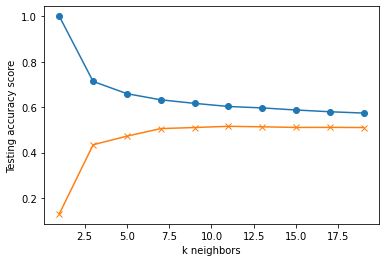

In [ ]:
# Borrowed and adapted from 19.2 Activity 6
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy score")
plt.show()

In [ ]:
# Try with k = 7

knn7 = KNeighborsRegressor(n_neighbors=7)

In [ ]:
# train model
knn7.fit(X_knn_train_scaled, y_knn_train)

KNeighborsRegressor(n_neighbors=7)

In [ ]:
# evaluate model on training set
knn7.score(X_knn_train_scaled, y_knn_train)

0.6327925600619995

In [ ]:
# evaluate model on test set
knn7.score(X_knn_test_scaled, y_knn_test)

0.5175826155218659

In [ ]:
# Try with k = 5

knn5 = KNeighborsRegressor(n_neighbors=5)

In [ ]:
# train model
knn5.fit(X_knn_train_scaled, y_knn_train)

KNeighborsRegressor()

In [ ]:
# evaluate model on training set 
knn5.score(X_knn_train_scaled, y_knn_train)

0.6568778400215458

In [ ]:
# evaluate model on testing set 
knn5.score(X_knn_test_scaled, y_knn_test)

0.5144217172021863

In [ ]:
# Try with k = 9

knn9 = KNeighborsRegressor(n_neighbors=9)

In [ ]:
# train model 
knn9.fit(X_knn_train_scaled, y_knn_train)

KNeighborsRegressor(n_neighbors=9)

In [ ]:
# evaluate model on training set
knn9.score(X_knn_train_scaled, y_knn_train)

0.6119803742606059

In [ ]:
# evaluate model on test set
knn9.score(X_knn_test_scaled, y_knn_test)

0.5184358874584232

K Nearest Neighbors Regressor worked about as well as the Multiple Linear Regression (that is to say, not well). It also seems to be overfitting the data (training score is higher than the testing score by a bunch). Time to try something else. I'm going to try a Support Vector Regression.

### Support Vector Regression

In [ ]:
# import support vector regression
from sklearn.svm import SVR

In [ ]:
# Split data into training and testing set
X_svr = df_no_outliers.drop(columns = "Rings")
y_svr = df_no_outliers["Rings"]

In [ ]:
# Split data into training and testing set
X_svr_train, X_svr_test, y_svr_train, y_svr_test = train_test_split(X_svr, y_svr, random_state = 3)

In [ ]:
# Scale with standard scaler
scaler = StandardScaler()

In [ ]:
# Fit data to scaler
scaler.fit(X_svr_train)

StandardScaler()

In [ ]:
# scale data 
X_svr_train_scaled = scaler.transform(X_svr_train)
X_svr_test_scaled = scaler.transform(X_svr_test)

In [ ]:
svr = SVR()

In [ ]:
# Train model
svr.fit(X_svr_train_scaled, y_svr_train)

SVR()

In [ ]:
# Evaluate model on training set
svr.score(X_svr_train_scaled, y_svr_train)

0.5467901792826577

In [ ]:
# Evaluate model on testing set
svr.score(X_svr_test_scaled, y_svr_test)

0.5443014471089089

SVR did slightly better than the others, but still not very good. Let's try something completely different: a Random Forest

### Random Forest Regressor

In [ ]:
# import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
forest = RandomForestRegressor()

In [ ]:
# split data into training and testing sets
X_forest = df_no_outliers.drop(columns = "Rings")
y_forest = df_no_outliers["Rings"]

In [ ]:
# split data into training and testing sets
X_forest_train, X_forest_test, y_forest_train, y_forest_test = train_test_split(X_forest, y_forest, random_state = 3)

In [ ]:
# scale data with standard scaler
scaler = StandardScaler()

In [ ]:
# fit data to scaler
scaler.fit(X_forest_train)

StandardScaler()

In [ ]:
# scale data
X_forest_train_scaled = scaler.transform(X_forest_train)
X_forest_test_scaled = scaler.transform(X_forest_test)

In [ ]:
# setting up random forest
forest = RandomForestRegressor(n_estimators= 1000, random_state = 3, max_depth = 7, max_features = 5)

In [ ]:
# train model
forest.fit(X_forest_train_scaled, y_forest_train)

RandomForestRegressor(max_depth=7, max_features=5, n_estimators=1000,
                      random_state=3)

In [ ]:
# evaluate model on training data
forest.score(X_forest_train_scaled, y_forest_train)

0.6849268856324697

In [ ]:
# evaluate model on testing data
forest.score(X_forest_test_scaled, y_forest_test)

0.5532751890702399

### Neural Network
In this section, we use neural neural networks to see if we can get better results from our data.

#### Set up for Neural Network

In [ ]:
# Split data into training and testing sets
X_nn = df_no_outliers.drop(columns = "Rings")
y_nn = df_no_outliers["Rings"]

In [ ]:
# Split data into training and testing sets
X_nn_train, X_nn_test, y_nn_train, y_nn_test = train_test_split(X_nn, y_nn, random_state = 3)

In [ ]:
# Find data-points with only one entry and remove them
df_no_outliers.groupby("Rings").count()["Length"]

Rings
1       1
2       1
3      15
4      57
5     115
6     258
7     391
8     566
9     689
10    633
11    487
12    267
13    203
14    126
15    103
16     67
17     58
18     42
19     32
20     26
21     14
22      6
23      9
24      2
25      1
26      1
27      2
29      1
Name: Length, dtype: int64

In [ ]:
# Find data-points with only one entry and remove them
df_rings = df_no_outliers[~df_no_outliers['Rings'].isin([1, 2, 25, 26, 29])]

In [ ]:
# Take a look at newly created dataframe
df_rings

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1,0,0


In [ ]:
df_rings.groupby("Rings").count()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_F,Sex_I,Sex_M
Rings,,,,,,,,,,
3,15,15,15,15,15,15,15,15,15,15
4,57,57,57,57,57,57,57,57,57,57
5,115,115,115,115,115,115,115,115,115,115
6,258,258,258,258,258,258,258,258,258,258
7,391,391,391,391,391,391,391,391,391,391
8,566,566,566,566,566,566,566,566,566,566
9,689,689,689,689,689,689,689,689,689,689
10,633,633,633,633,633,633,633,633,633,633
11,487,487,487,487,487,487,487,487,487,487


In [ ]:
# Split data into training and testing sets
X_nn_new = df_rings.drop(columns = "Rings")
y_nn_new = df_rings["Rings"]

In [ ]:
# split data into training and testing sets
X_nn_train, X_nn_test, y_nn_train, y_nn_test = train_test_split(X_nn_new, y_nn_new, random_state = 3, stratify = y_nn_new)

In [ ]:
# scale data with MinMax Scaler
scaler = MinMaxScaler()

In [ ]:
# Fit data to scaler
scaler.fit(X_nn_train)

MinMaxScaler()

In [ ]:
# scale data
X_nn_train_scaled = scaler.transform(X_nn_train)
X_nn_test_scaled = scaler.transform(X_nn_test)

#### Original Neural Network

In [ ]:
# build neural network model. 50 epochs, 30 units. Linear activation on output layer. Using MSE because we are performing a regression. 
nn_model = tf.keras.models.Sequential()

nn_model.add(tf.keras.layers.Dense(units = 30, activation = "relu", input_dim = 10))
nn_model.add(tf.keras.layers.Dense(units = 1, activation = "linear"))

nn_model.compile(loss = "mean_squared_error", optimizer = "adam")

fit_model = nn_model.fit(X_nn_train_scaled, y_nn_train, epochs = 50)

Epoch 1/20
98/98 [==============================] - 2s 7ms/step - loss: 94.5495
Epoch 2/20
98/98 [==============================] - 1s 8ms/step - loss: 49.3431
Epoch 3/20
98/98 [==============================] - 0s 2ms/step - loss: 14.1595
Epoch 4/20
98/98 [==============================] - 0s 3ms/step - loss: 7.4846
Epoch 5/20
98/98 [==============================] - 0s 3ms/step - loss: 7.1992
Epoch 6/20
98/98 [==============================] - 0s 3ms/step - loss: 7.1388
Epoch 7/20
98/98 [==============================] - 0s 2ms/step - loss: 7.0801
Epoch 8/20
98/98 [==============================] - 0s 2ms/step - loss: 7.0176
Epoch 9/20
98/98 [==============================] - 0s 2ms/step - loss: 6.9626
Epoch 10/20
98/98 [==============================] - 0s 3ms/step - loss: 6.9057
Epoch 11/20
98/98 [==============================] - 0s 2ms/step - loss: 6.8542
Epoch 12/20
98/98 [==============================] - 0s 2ms/step - loss: 6.7948
Epoch 13/20
98/98 [===========================

In [ ]:
# test model 
y_test_predicted = nn_model.predict(X_nn_test_scaled)

33/33 [==============================] - 0s 2ms/step


In [ ]:
# Calculate coefficient of determination
r2_score(y_nn_test, y_test_predicted)

0.41218778875249795

#### NN2

Added a hidden layer

In [ ]:
# Build second neural network model. Another hidden layer, same amount of units and epochs as NN NO.1
nn_model2 = tf.keras.models.Sequential()
nn_model2.add(tf.keras.layers.Dense(units= 30, activation = 'relu', input_dim = 10))
nn_model2.add(tf.keras.layers.Dense(units = 30, activation = 'relu'))
nn_model2.add(tf.keras.layers.Dense(units = 1 , activation = 'linear'))

nn_model2.compile(loss = 'mean_squared_error', optimizer = 'adam')

fit_model2 = nn_model2.fit(X_nn_train_scaled, y_nn_train, epochs=50)

#model_loss, model_accuracy = nn_model.evaluate(X_nn_train_scaled, y_nn_train, verbose=2)
#print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/50
98/98 [==============================] - 2s 4ms/step - loss: 54.3725
Epoch 2/50
98/98 [==============================] - 0s 3ms/step - loss: 6.9679
Epoch 3/50
98/98 [==============================] - 0s 3ms/step - loss: 6.7349
Epoch 4/50
98/98 [==============================] - 0s 3ms/step - loss: 6.6139
Epoch 5/50
98/98 [==============================] - 0s 3ms/step - loss: 6.4837
Epoch 6/50
98/98 [==============================] - 0s 3ms/step - loss: 6.3730
Epoch 7/50
98/98 [==============================] - 0s 2ms/step - loss: 6.2733
Epoch 8/50
98/98 [==============================] - 0s 2ms/step - loss: 6.1559
Epoch 9/50
98/98 [==============================] - 0s 2ms/step - loss: 6.1067
Epoch 10/50
98/98 [==============================] - 0s 3ms/step - loss: 5.9744
Epoch 11/50
98/98 [==============================] - 0s 3ms/step - loss: 5.8807
Epoch 12/50
98/98 [==============================] - 0s 3ms/step - loss: 5.7489
Epoch 13/50
98/98 [=============================

In [ ]:
# test model
y_test_predicted2 = nn_model2.predict(X_nn_test_scaled)

33/33 [==============================] - 0s 2ms/step


In [ ]:
# Calculate coefficient of determination
r2_score(y_nn_test, y_test_predicted2)

0.5772931671854573

#### NN3

Drop the sex columns

In [ ]:
# dropping sex columns to see if there is any change
df_no_sex = df.drop(columns = ["Sex_F", "Sex_I", "Sex_M"])
df_no_sex

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [ ]:
# split data into training and testing sets
X_no_sex = df_no_sex.drop(columns = "Rings")
y_no_sex = df_no_sex["Rings"]

In [ ]:
# split data into training and testing sets
X_nn3_train, X_nn3_test, y_nn3_train, y_nn3_test = train_test_split(X_no_sex, y_no_sex, random_state = 3)

In [ ]:
# scale data with MinMax Scaler
no_sex_scaler = MinMaxScaler()

In [ ]:
# fit data to scaler
no_sex_scaler.fit(X_nn3_train)

MinMaxScaler()

In [ ]:
# scale data
X_nn3_train_scaled = no_sex_scaler.transform(X_nn3_train)
X_nn3_test_scaled = no_sex_scaler.transform(X_nn3_test)

In [ ]:
# make sure scaled data exists
X_nn3_train_scaled

array([[0.53900709, 0.55357143, 0.11946903, ..., 0.22321098, 0.16688654,
        0.16566866],
       [0.62411348, 0.5625    , 0.13274336, ..., 0.30367075, 0.27902375,
        0.23652695],
       [0.73049645, 0.70535714, 0.14159292, ..., 0.46607341, 0.29221636,
        0.29840319],
       ...,
       [0.70212766, 0.74107143, 0.15929204, ..., 0.53837597, 0.34564644,
        0.42714571],
       [0.53900709, 0.52678571, 0.12389381, ..., 0.1449759 , 0.16490765,
        0.17165669],
       [0.73049645, 0.71428571, 0.1460177 , ..., 0.36114201, 0.34234828,
        0.32884232]])

In [ ]:
# build NN Model NO.3
nn_model3 = tf.keras.models.Sequential()
nn_model3.add(tf.keras.layers.Dense(units= 30, activation = 'relu', input_dim = 7))
nn_model3.add(tf.keras.layers.Dense(units = 30, activation = 'relu'))
nn_model3.add(tf.keras.layers.Dense(units = 1 , activation = 'linear'))

nn_model3.compile(loss = 'mean_squared_error', optimizer = 'adam')

fit_model3 = nn_model3.fit(X_nn3_train_scaled, y_nn3_train, epochs=50)

Epoch 1/50
98/98 [==============================] - 1s 3ms/step - loss: 74.2518
Epoch 2/50
98/98 [==============================] - 0s 2ms/step - loss: 12.0283
Epoch 3/50
98/98 [==============================] - 0s 2ms/step - loss: 7.7504
Epoch 4/50
98/98 [==============================] - 0s 2ms/step - loss: 7.3737
Epoch 5/50
98/98 [==============================] - 0s 3ms/step - loss: 7.0921
Epoch 6/50
98/98 [==============================] - 0s 2ms/step - loss: 6.9207
Epoch 7/50
98/98 [==============================] - 0s 2ms/step - loss: 6.7701
Epoch 8/50
98/98 [==============================] - 0s 2ms/step - loss: 6.6488
Epoch 9/50
98/98 [==============================] - 0s 2ms/step - loss: 6.5356
Epoch 10/50
98/98 [==============================] - 0s 2ms/step - loss: 6.4446
Epoch 11/50
98/98 [==============================] - 0s 3ms/step - loss: 6.3347
Epoch 12/50
98/98 [==============================] - 0s 3ms/step - loss: 6.2656
Epoch 13/50
98/98 [============================

In [ ]:
# test NN Model No.3
y_test_predicted3 = nn_model3.predict(X_nn3_test_scaled)


33/33 [==============================] - 0s 2ms/step


In [ ]:
# Calculate coefficient of determination
r2_score(y_nn3_test, y_test_predicted3)

0.521016321263474

#### NN4

More epochs?

In [ ]:
# Build NN Model No.4 - 100 epochs instead of 50
nn_model4 = tf.keras.models.Sequential()
nn_model4.add(tf.keras.layers.Dense(units= 30, activation = 'relu', input_dim = 10))
nn_model4.add(tf.keras.layers.Dense(units = 30, activation = 'relu'))
nn_model4.add(tf.keras.layers.Dense(units = 1 , activation = 'linear'))

nn_model4.compile(loss = 'mean_squared_error', optimizer = 'adam')

fit_model4 = nn_model4.fit(X_nn_train_scaled, y_nn_train, epochs=100)

Epoch 1/100
98/98 [==============================] - 1s 3ms/step - loss: 62.1356
Epoch 2/100
98/98 [==============================] - 0s 3ms/step - loss: 7.0839
Epoch 3/100
98/98 [==============================] - 0s 3ms/step - loss: 6.8783
Epoch 4/100
98/98 [==============================] - 0s 2ms/step - loss: 6.7272
Epoch 5/100
98/98 [==============================] - 0s 3ms/step - loss: 6.5960
Epoch 6/100
98/98 [==============================] - 0s 4ms/step - loss: 6.4761
Epoch 7/100
98/98 [==============================] - 0s 3ms/step - loss: 6.3888
Epoch 8/100
98/98 [==============================] - 0s 3ms/step - loss: 6.2796
Epoch 9/100
98/98 [==============================] - 0s 3ms/step - loss: 6.1725
Epoch 10/100
98/98 [==============================] - 0s 3ms/step - loss: 6.0836
Epoch 11/100
98/98 [==============================] - 0s 2ms/step - loss: 5.9951
Epoch 12/100
98/98 [==============================] - 0s 3ms/step - loss: 5.8802
Epoch 13/100
98/98 [================

In [ ]:
# test model
y_test_predicted4 = nn_model4.predict(X_nn_test_scaled)

33/33 [==============================] - 0s 2ms/step


In [ ]:
# Calculate coefficient of determination
r2_score(y_nn_test, y_test_predicted4)

0.5584318539019635

#### NN5
Added another hidden layer

In [ ]:
# Build NN Model No.5 - one more hidden layer, back to 50 epochs.
nn_model5 = tf.keras.models.Sequential()
nn_model5.add(tf.keras.layers.Dense(units= 30, activation = 'relu', input_dim = 10))
nn_model5.add(tf.keras.layers.Dense(units = 30, activation = 'relu'))
nn_model5.add(tf.keras.layers.Dense(units = 30, activation = 'relu'))
nn_model5.add(tf.keras.layers.Dense(units = 1 , activation = 'linear'))

nn_model5.compile(loss = 'mean_squared_error', optimizer = 'adam')

fit_model5 = nn_model5.fit(X_nn_train_scaled, y_nn_train, epochs=50)

Epoch 1/50
98/98 [==============================] - 1s 4ms/step - loss: 63.2492
Epoch 2/50
98/98 [==============================] - 0s 4ms/step - loss: 7.1966
Epoch 3/50
98/98 [==============================] - 0s 4ms/step - loss: 6.7142
Epoch 4/50
98/98 [==============================] - 0s 4ms/step - loss: 6.5537
Epoch 5/50
98/98 [==============================] - 0s 3ms/step - loss: 6.4424
Epoch 6/50
98/98 [==============================] - 0s 4ms/step - loss: 6.2696
Epoch 7/50
98/98 [==============================] - 0s 3ms/step - loss: 6.1025
Epoch 8/50
98/98 [==============================] - 0s 4ms/step - loss: 5.9704
Epoch 9/50
98/98 [==============================] - 0s 4ms/step - loss: 5.8303
Epoch 10/50
98/98 [==============================] - 0s 3ms/step - loss: 5.6845
Epoch 11/50
98/98 [==============================] - 0s 4ms/step - loss: 5.5721
Epoch 12/50
98/98 [==============================] - 0s 2ms/step - loss: 5.3628
Epoch 13/50
98/98 [=============================

In [ ]:
# test model

y_test_predicted5 = nn_model5.predict(X_nn_test_scaled)

33/33 [==============================] - 0s 2ms/step


In [ ]:
# Calculate coefficient of determination
r2_score(y_nn_test, y_test_predicted5)

0.59189548829113

#### NN6 
3 hidden layers with more epochs

In [ ]:
# Build NN Model No.6 - 3 hidden layers with 75 epochs
nn_model6 = tf.keras.models.Sequential()
nn_model6.add(tf.keras.layers.Dense(units= 30, activation = 'relu', input_dim = 10))
nn_model6.add(tf.keras.layers.Dense(units = 30, activation = 'relu'))
nn_model6.add(tf.keras.layers.Dense(units = 30, activation = 'relu'))
nn_model6.add(tf.keras.layers.Dense(units = 1 , activation = 'linear'))

nn_model6.compile(loss = 'mean_squared_error', optimizer = 'adam')

fit_model6 = nn_model6.fit(X_nn_train_scaled, y_nn_train, epochs=75)

Epoch 1/75
98/98 [==============================] - 1s 3ms/step - loss: 55.9359
Epoch 2/75
98/98 [==============================] - 0s 3ms/step - loss: 6.9487
Epoch 3/75
98/98 [==============================] - 0s 4ms/step - loss: 6.6591
Epoch 4/75
98/98 [==============================] - 0s 4ms/step - loss: 6.4743
Epoch 5/75
98/98 [==============================] - 0s 3ms/step - loss: 6.2675
Epoch 6/75
98/98 [==============================] - 0s 3ms/step - loss: 6.0502
Epoch 7/75
98/98 [==============================] - 0s 3ms/step - loss: 5.8627
Epoch 8/75
98/98 [==============================] - 0s 3ms/step - loss: 5.7146
Epoch 9/75
98/98 [==============================] - 0s 4ms/step - loss: 5.6049
Epoch 10/75
98/98 [==============================] - 0s 4ms/step - loss: 5.4101
Epoch 11/75
98/98 [==============================] - 0s 4ms/step - loss: 5.2701
Epoch 12/75
98/98 [==============================] - 0s 4ms/step - loss: 5.2404
Epoch 13/75
98/98 [=============================

In [ ]:
# test model
y_test_predicted6 = nn_model6.predict(X_nn_test_scaled)

33/33 [==============================] - 0s 2ms/step


In [ ]:
# Calculate coefficient of determination
r2_score(y_nn_test, y_test_predicted6)

0.5903702030951719

#### NN7
In this section, we explore using keras tuner to try to refine our neural network models to get better results

In [ ]:
# Install kerastuner
!pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# make create_model function

def create_model(hp):
  nn_model7 = tf.keras.models.Sequential()

  activation = hp.Choice('activation', ['relu', 'tanh'])

  nn_model7.add(tf.keras.layers.Dense(units=hp.Int('first_units',
                                                  min_value = 1,
                                                  max_value = 30,
                                                  step=1), activation=activation, input_dim=10))
  
  nn_model7.add(tf.keras.layers.Dense(units = 1, activation = "linear"))
  nn_model7.compile(loss='mean_absolute_error', optimizer='adam', metrics = ['mean_absolute_error'])
  return nn_model7

In [ ]:
# import keras tuner
import keras_tuner as kt

# setting up hyperband tuner
tuner = kt.Hyperband(
    create_model,
    objective=kt.Objective("val_mean_absolute_error", direction ="min"),
    max_epochs=20,
    hyperband_iterations=2)


NameError: ignored

In [ ]:

tuner.get_best_hyperparameters()[0].values

{'activation': 'relu',
 'first_units': 24,
 'tuner/epochs': 20,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 0,
 'tuner/round': 0}

In [ ]:
# run keras tuner search for best hyperparameters
tuner.search(X_nn_train_scaled, y_nn_train, epochs=20, validation_data=(X_nn_test_scaled, y_nn_test))

In [ ]:
# evaluate top 3 models against test dataset
top_model = tuner.get_best_models(3)
for model in top_model:
  model_loss = model.evaluate(X_nn_test_scaled, y_nn_test, verbose=2)
  print(f'{model_loss}')


33/33 - 1s - loss: 1.6295 - mean_absolute_error: 1.6295 - 730ms/epoch - 22ms/step
[1.629518747329712, 1.629518747329712]
33/33 - 1s - loss: 1.6633 - mean_absolute_error: 1.6633 - 600ms/epoch - 18ms/step
[1.6632558107376099, 1.6632558107376099]
33/33 - 0s - loss: 1.6724 - mean_absolute_error: 1.6724 - 371ms/epoch - 11ms/step
[1.6723517179489136, 1.6723517179489136]


In [ ]:
# test model
y_test_predicted7 = top_model[0].predict(X_nn_test_scaled)

33/33 [==============================] - 0s 4ms/step


In [ ]:
# Calculate coefficient of determination (inconsistent results, possibly a result of not being able to fine-tune batch size without creating our own class)
r2_score(y_nn_test, y_test_predicted7)

0.40756625612493136

In [ ]:
# get second best model hyperparameters
second_hyper = tuner.get_best_hyperparameters(2)[0]
second_hyper.values

{'activation': 'relu',
 'first_units': 24,
 'tuner/epochs': 20,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 0,
 'tuner/round': 0}

In [ ]:
# evaluate performance of second-best model
second_model = tuner.get_best_models(2)[1]
model_loss, model_accuracy = second_model.evaluate(X_nn_test_scaled, y_nn_test, verbose=2)
print(f'loss: {model_loss}, accuracy: {model_accuracy}')

33/33 - 0s - loss: 1.6633 - mean_absolute_error: 1.6633 - 209ms/epoch - 6ms/step
loss: 1.6632558107376099, accuracy: 1.6632558107376099


#### NN8
Thought adding more layers to keras tuner model would help get more consistent results. 

In [ ]:
# create model function
def create_model2(hp):
  nn_model8 = tf.keras.models.Sequential()

  activation = hp.Choice('activation', ['relu', 'tanh'])

  nn_model8.add(tf.keras.layers.Dense(units=hp.Int('first_units',
                                                  min_value = 1,
                                                  max_value = 9,
                                                  step=2), activation=activation, input_dim=10))
  nn_model8.add(tf.keras.layers.Dense(units=hp.Int('second_units',
                                                  min_value = 1,
                                                  max_value = 9,
                                                  step=2), activation = 'relu' ))
  nn_model8.add(tf.keras.layers.Dense(units = 1, activation = "linear"))
  nn_model8.compile(loss='mean_absolute_error', optimizer='adam', metrics = ['mean_absolute_error'])
  return nn_model8

In [ ]:
# setting up hyperband tuner
tuner2 = kt.Hyperband(
    create_model2,
    objective=kt.Objective("val_mean_absolute_error", direction ="min"),
    max_epochs=20,
    hyperband_iterations=2)


In [ ]:
# run keras tuner search for best hyperparameters
tuner2.search(X_nn_train_scaled, y_nn_train, epochs=20, validation_data=(X_nn_test_scaled, y_nn_test))

In [ ]:
# evaluate top 3 models against test dataset
top_model2 = tuner2.get_best_models(3)
for model in top_model2:
  model_loss = model.evaluate(X_nn_test_scaled, y_nn_test, verbose=2)
  print(f'{model_loss}')

33/33 - 0s - loss: 21.7895 - mean_absolute_error: 21.7895 - 242ms/epoch - 7ms/step
[21.789541244506836, 21.789541244506836]
33/33 - 0s - loss: 3.3028 - mean_absolute_error: 3.3028 - 321ms/epoch - 10ms/step
[3.3028457164764404, 3.3028457164764404]
33/33 - 0s - loss: 2.5194 - mean_absolute_error: 2.5194 - 333ms/epoch - 10ms/step
[2.519432306289673, 2.519432306289673]


In [ ]:
# test model 
y_test_predicted8 = top_model2[0].predict(X_nn_test_scaled)

33/33 [==============================] - 0s 1ms/step


In [ ]:
# Calculate coefficient of determination (inconsistent results, possibly a result of not being able to fine-tune batch size without creating our own class)
r2_score(y_nn_test, y_test_predicted8)

-48.59786644444293

In [ ]:
# get second best model hyperparameters
second_hyper = tuner.get_best_hyperparameters(2)[0]
second_hyper.values

{'activation': 'relu',
 'first_units': 24,
 'tuner/epochs': 20,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 0,
 'tuner/round': 0}

In [ ]:
# evaluate performance of second-best model
second_model = tuner2.get_best_models(2)[1]
model_loss, model_accuracy = second_model.evaluate(X_nn_test_scaled, y_nn_test, verbose=2)
print(f'loss: {model_loss}, accuracy: {model_accuracy}')

33/33 - 0s - loss: 13.5638 - mean_absolute_error: 13.5638 - 290ms/epoch - 9ms/step
loss: 13.563755989074707, accuracy: 13.563755989074707


#### NN9 
Keras Tuner with more epochs

In [ ]:
# make create_model function

def create_model3(hp):
  nn_model9 = tf.keras.models.Sequential()

  activation = hp.Choice('activation', ['relu', 'tanh'])

  nn_model9.add(tf.keras.layers.Dense(units=hp.Int('first_units',
                                                  min_value = 1,
                                                  max_value = 30,
                                                  step=1), activation=activation, input_dim=10))
  nn_model9.add(tf.keras.layers.Dense(units=hp.Int('second_units',
                                                   min_value = 1,
                                                   max_value = 30,
                                                   step = 1), activation = 'relu'))
  nn_model9.add(tf.keras.layers.Dense(units = 1, activation = "linear"))
  nn_model9.compile(loss='mean_absolute_error', optimizer='adam', metrics = ['mean_absolute_error'])
  return nn_model9

In [ ]:
# setting up hyperband tuner
tuner3 = kt.Hyperband(
    create_model3,
    objective=kt.Objective("val_mean_absolute_error", direction ="min"),
    max_epochs=50,
    hyperband_iterations=2)


In [ ]:
# run keras tuner search for best hyperparameters
tuner3.search(X_nn_train_scaled, y_nn_train, epochs=50, validation_data=(X_nn_test_scaled, y_nn_test))

In [ ]:
# evaluate top 3 models against test dataset
top_model3 = tuner3.get_best_models(3)
for model in top_model3:
  model_loss = model.evaluate(X_nn_test_scaled, y_nn_test, verbose=2)
  print(f'{model_loss}')

33/33 - 0s - loss: 18.6688 - mean_absolute_error: 18.6688 - 235ms/epoch - 7ms/step
[18.668766021728516, 18.668766021728516]
33/33 - 0s - loss: 22.1196 - mean_absolute_error: 22.1196 - 248ms/epoch - 8ms/step
[22.119552612304688, 22.119552612304688]
33/33 - 0s - loss: 13.3047 - mean_absolute_error: 13.3047 - 257ms/epoch - 8ms/step
[13.304729461669922, 13.304729461669922]


In [ ]:
# test model 
y_test_predicted9 = top_model3[0].predict(X_nn_test_scaled)

33/33 [==============================] - 0s 1ms/step


In [ ]:
# Calculate coefficient of determination (inconsistent results, possibly a result of not being able to fine-tune batch size without creating our own class)
r2_score(y_nn_test, y_test_predicted9)

-35.58237187506781

#### NN10
Keras tuner 75 epochs

In [ ]:
# make create_model function
def create_model4(hp):
  nn_model10 = tf.keras.models.Sequential()

  activation = hp.Choice('activation', ['relu', 'tanh'])

  nn_model10.add(tf.keras.layers.Dense(units=hp.Int('first_units',
                                                  min_value = 1,
                                                  max_value = 30,
                                                  step=1), activation=activation, input_dim=10))
  nn_model10.add(tf.keras.layers.Dense(units=hp.Int('second_units',
                                                  min_value = 1,
                                                  max_value = 30,
                                                  step=1), activation = 'relu' ))
  nn_model10.add(tf.keras.layers.Dense(units = 1, activation = "linear"))
  nn_model10.compile(loss='mean_absolute_error', optimizer='adam', metrics = ['mean_absolute_error'])
  return nn_model10

In [ ]:
# setting up hyperband tuner
tuner4 = kt.Hyperband(
    create_model4,
    objective=kt.Objective("val_mean_absolute_error", direction ="min"),
    max_epochs=75,
    hyperband_iterations=2)

In [ ]:
# run keras tuner search for best hyperparameters
tuner4.search(X_nn_train_scaled, y_nn_train, epochs=75, validation_data=(X_nn_test_scaled, y_nn_test))

In [ ]:
# evaluate top 3 models against test dataset
top_model4 = tuner4.get_best_models(3)
for model in top_model4:
  model_loss = model.evaluate(X_nn_test_scaled, y_nn_test, verbose=2)
  print(f'{model_loss}')

33/33 - 0s - loss: 23.5178 - mean_absolute_error: 23.5178 - 271ms/epoch - 8ms/step
[23.51777458190918, 23.51777458190918]
33/33 - 0s - loss: 2.7729 - mean_absolute_error: 2.7729 - 361ms/epoch - 11ms/step
[2.7729039192199707, 2.7729039192199707]
33/33 - 0s - loss: 11.0202 - mean_absolute_error: 11.0202 - 295ms/epoch - 9ms/step
[11.020216941833496, 11.020216941833496]


In [ ]:
# test model
y_test_predicted10 = top_model4[0].predict(X_nn_test_scaled)

33/33 [==============================] - 0s 1ms/step


In [ ]:
# Calculate coefficient of determination (inconsistent results, possibly a result of not being able to fine-tune batch size without creating our own class)
r2_score(y_nn_test, y_test_predicted10)

-56.66745992494225